In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Load data

In [2]:
actual_path = os.path.dirname(os.path.realpath('__file__'))

raw_data_train = open(actual_path+'/titanic/train.csv', 'rt')

df = pd.read_csv(raw_data_train)

# Inspect data

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print(df.shape)
df.isnull().sum()

(891, 12)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

La columna Cabin no me aporta nada ya que hay 687 valores que son nulos. El nombre del pasajero lo puedo quitar ya que tampoco me aportara nada en mi modelo.

In [6]:
df = df.drop(columns=['PassengerId','Name', 'Cabin'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
columnas_object = df.select_dtypes(include='object').columns
print(columnas_object)

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')


In [9]:
for col in columnas_object:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: Sex
male      577
female    314
Name: Sex, dtype: int64


Column: Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


Column: Embarked
S    644
C    168
Q     77
Name: Embarked, dtype: int64




In [10]:
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Aplicar Label Encoding a cada columna
df['Pclass'] = label_encoder.fit_transform(df['Pclass'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])
df['Sex'] = label_encoder.fit_transform(df['Sex'])

df = df.drop(columns=['Ticket'], axis=1)

In [11]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


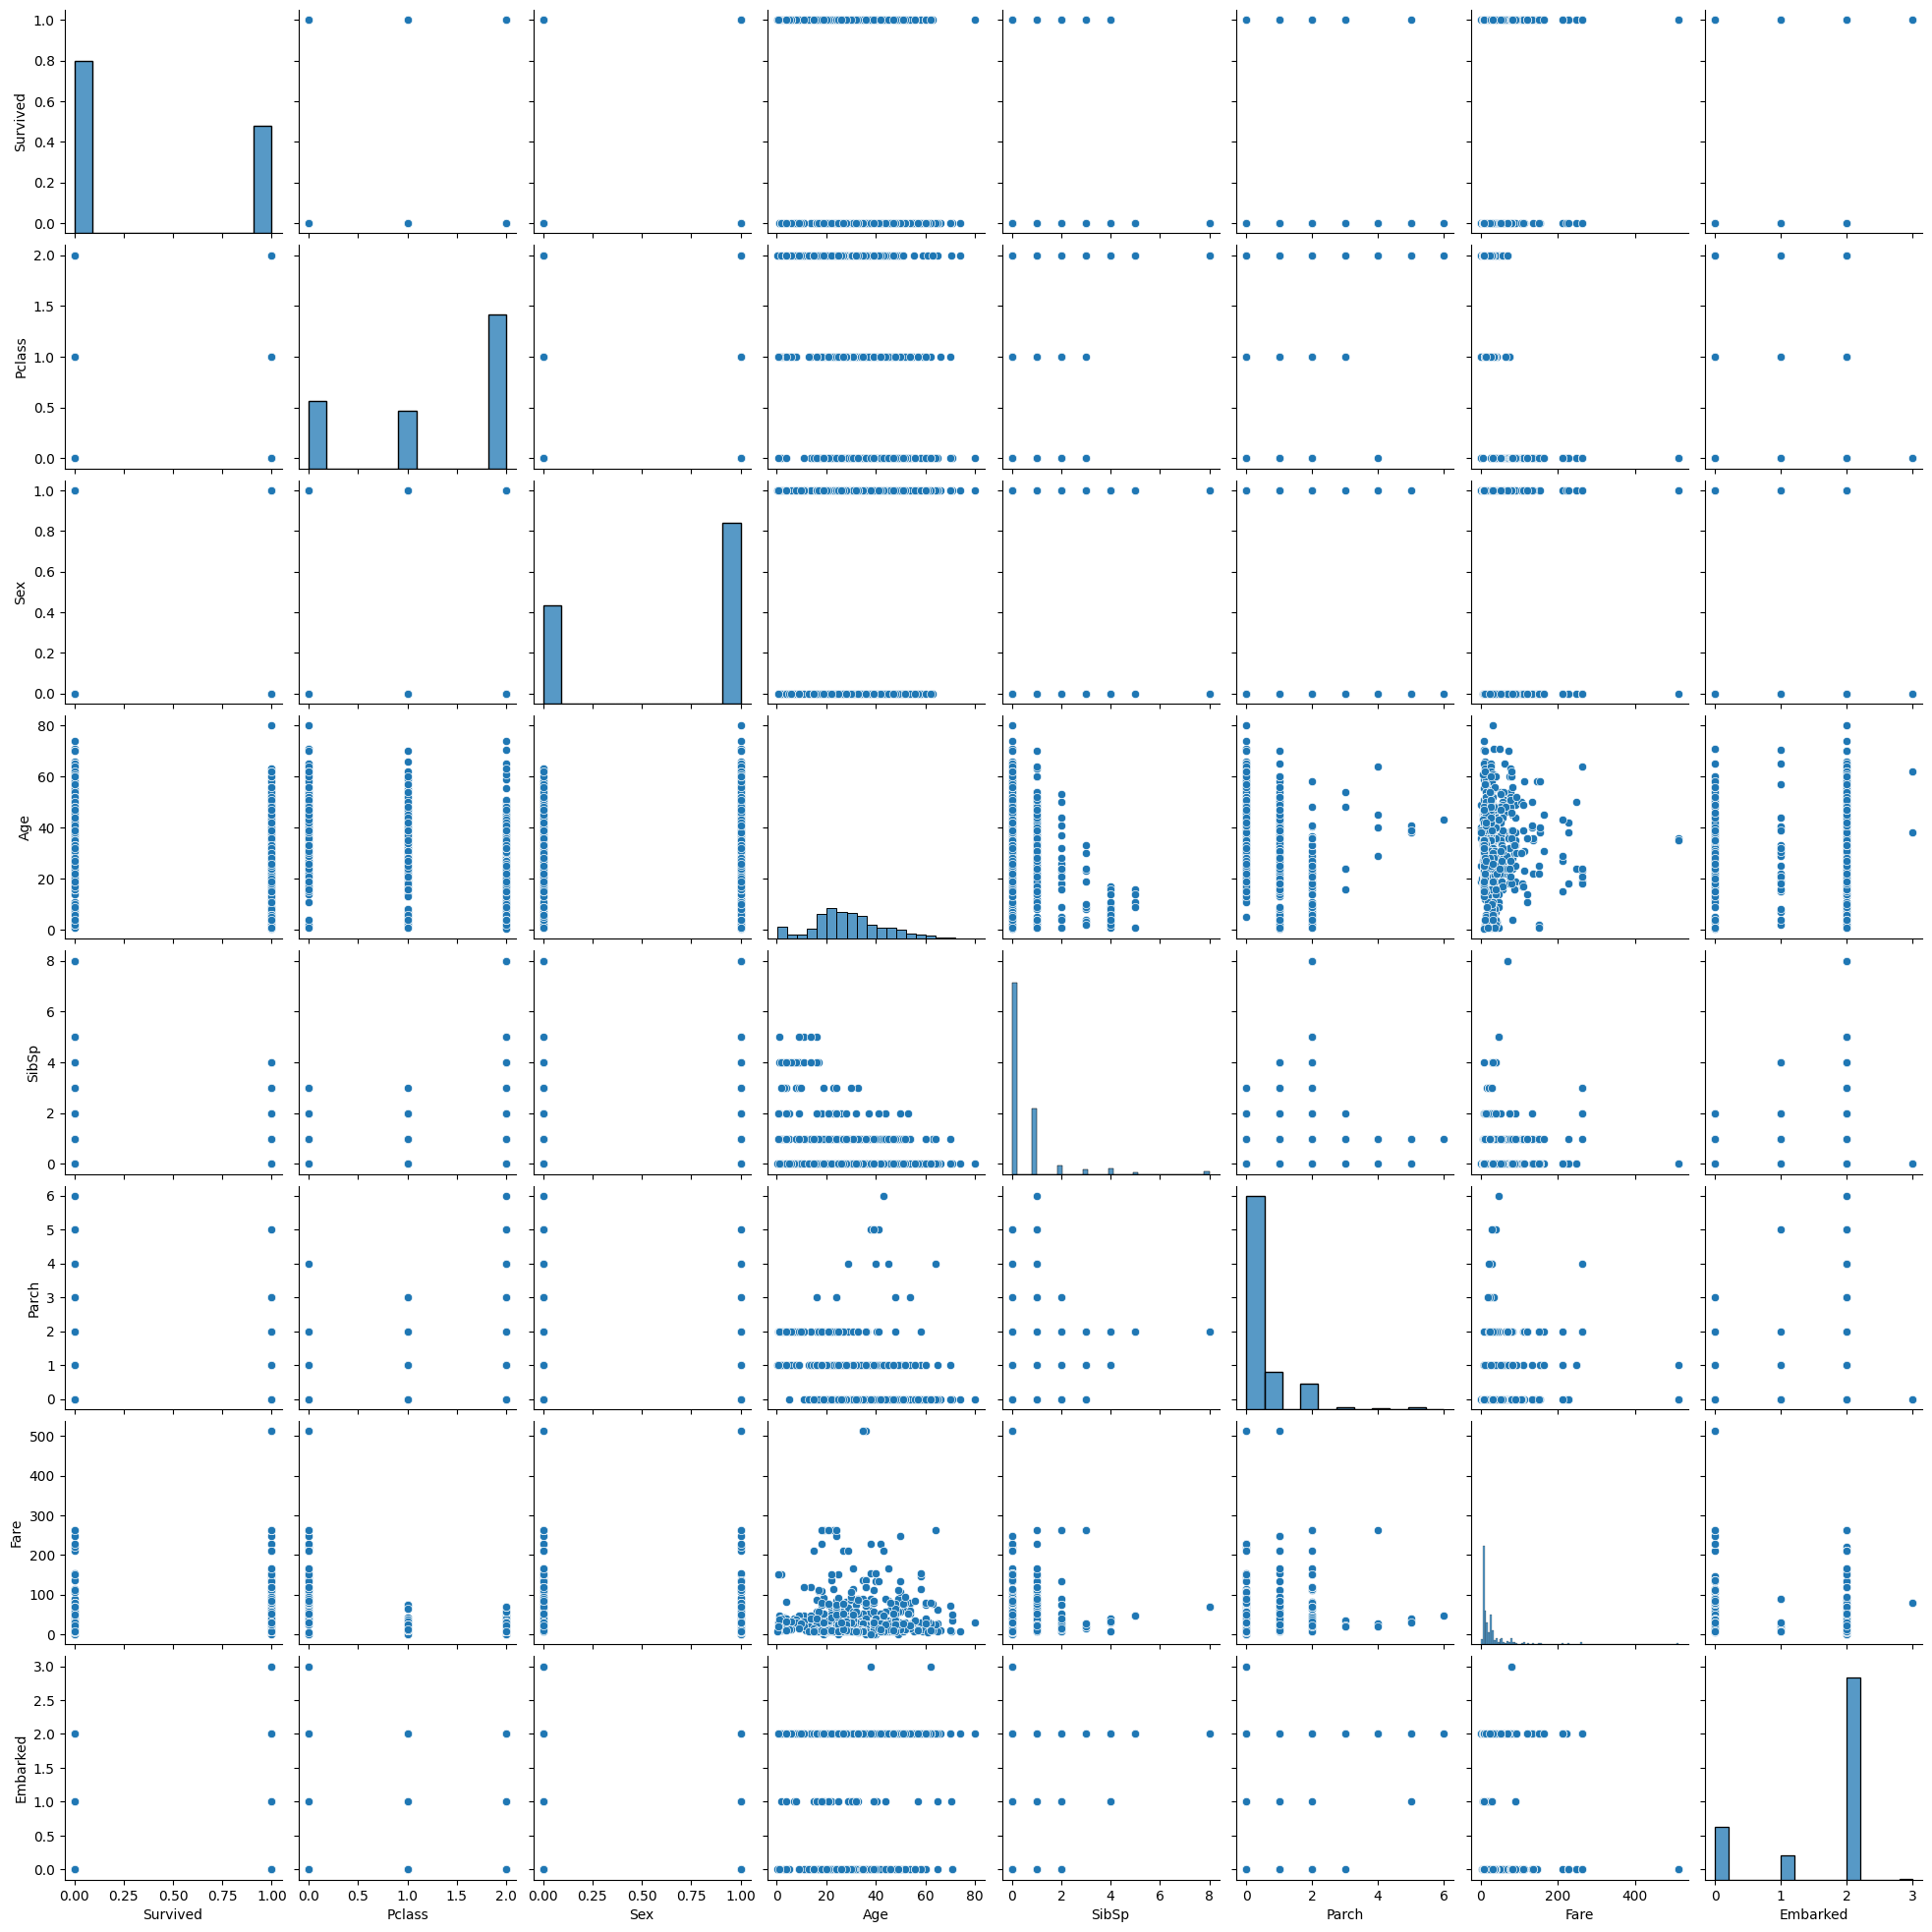

In [13]:
sns.pairplot(df)
plt.show()

# Scale data

In [14]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,22.0,1,0,7.2500,2
1,1,0,0,38.0,1,0,71.2833,0
2,1,2,0,26.0,0,0,7.9250,2
3,1,0,0,35.0,1,0,53.1000,2
4,0,2,1,35.0,0,0,8.0500,2


In [15]:
df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

In [16]:
df = df.dropna()

df_y = df['Survived']
df = df.drop(columns=['Survived'])

X = df
y = df_y

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models

In [19]:
models = []

## Logistic Regression

In [20]:
logistic_regresion = LogisticRegression(random_state=0)
logistic_regresion.fit(X_train, y_train)
models.append(logistic_regresion)

In [21]:
y_pred = logistic_regresion.predict(X_test)
accuracy_score(y_test, y_pred)

0.8461538461538461

## SVC

In [22]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', random_state=0)

svc.fit(X_train, y_train)
models.append(svc)

y_pred = svc.predict(X_test)

accuracy_score(y_test, y_pred)

0.7972027972027972

## XGBoost

In [23]:
import xgboost as xgb
param = {
    'max_depth': 5,
    'eta': 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'error'
}
epochs = 20

In [24]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

from xgboost import XGBClassifier

xbost = XGBClassifier(**param)
xbost.fit(X_train, y_train)
models.append(xbost)

y_pred = xbost.predict(X_test)
accuracy_score(y_test, y_pred)

0.8461538461538461

# Get the best model

In [25]:
results = []
all_models = []

for _ in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for model in models:
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        results.append((type(model).__name__, accuracy))
        all_models.append(model)

In [26]:
result = pd.DataFrame(results, columns=['Model', 'Accuracy'])
result

,Model,Accuracy
0,LogisticRegression,0.832168
1,SVC,0.818182
2,XGBClassifier,0.860140
3,LogisticRegression,0.839161
4,SVC,0.783217
5,XGBClassifier,0.811189
6,LogisticRegression,0.790210
7,SVC,0.783217
8,XGBClassifier,0.839161
9,LogisticRegression,0.853147


In [27]:
best_index, best_model = max(enumerate(results), key=lambda x: x[1][1])
print(f"Best Model: {best_model[0]}, Accuracy: {best_model[1]}")

Best Model: XGBClassifier, Accuracy: 0.9300699300699301


In [28]:
best_model = all_models[best_index]
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric='error',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

# Final Test

In [29]:
raw_data_test = open(actual_path+'/titanic/test.csv', 'rt')
test = pd.read_csv(raw_data_test)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Add same transformations

In [30]:
test_id = test['PassengerId']
test = test.drop(columns=['PassengerId','Name', 'Cabin'])
label_encoder = LabelEncoder()

# Aplicar Label Encoding a cada columna
test['Pclass'] = label_encoder.fit_transform(test['Pclass'])
test['Embarked'] = label_encoder.fit_transform(test['Embarked'])
test['Sex'] = label_encoder.fit_transform(test['Sex'])

test = test.drop(columns=['Ticket'], axis=1)

In [31]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,34.5,0,0,7.8292,1
1,2,0,47.0,1,0,7.0000,2
2,1,1,62.0,0,0,9.6875,1
3,2,1,27.0,0,0,8.6625,2
4,2,0,22.0,1,1,12.2875,2


In [32]:
test = scaler.transform(test)

In [33]:
final_predict = best_model.predict(test)

In [34]:
submission = pd.DataFrame({
    'PassengerId': test_id,
    'Survived': final_predict
})
submission.shape

(418, 2)

In [35]:
submission.to_csv(actual_path+'/submission.csv', index=False)